# Discrete Fourier Transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First note that we are dealing with the **discrete** Fourier Transform here. This maps a signal (in what is called configuration space) into the ... Mathematically:

$$
X(\omega_{k}) = \sum\limits_{n=0}^{N-1} x(t_n)\ e^{-i \omega_{k} t_n}
$$

where

* $X(\omega_k)$: the spectrum (or power spectrum) of the signal.
* $N$: the number of samples.
* $T$: the sampling interval (secs).
* $NT$: is therefore the total time of the signal (secs).
* $t_n$: the time of the nth sample. $= Tn$ (secs).
* $x(t_n)$: the value of the signal at the nth sample.

we can also define the sampling rate, $\Omega = 2 \pi / (NT)$ (rad/sec). From this we can get

* $\omega_k$: $k \Omega$, the frequency of the kth sample (rad/sec). For some values:
    * k = 0 -> 0. The mean!
    * k = 1 -> $2 \pi / (NT)$. One full revolutions ($2 \pi$) over the full signal
    * k = 2 -> $4 \pi / (NT)$. Two full ...
    * k = N/2 -> $\pi / T$. One full revolution over two samples ($2T$) 
    * k = N -> $2N \pi / (NT) = 2 \pi / T$. N full revolutions - revolution per sample

rewriting with $\omega_{k} = 2 \pi k / (NT)$ and $t_n = Tn$
$$
X(\omega_{k}) = \sum\limits_{n=0}^{N-1} x(t_n)\ e^{-i 2 \pi n k / N}
$$

Let's now think about a couple of the modes. Starting with $k = 0$.
$$
X(\omega_{0}) = \sum\limits_{n=0}^{N-1} x(t_n)
$$

This is just the sum of the samples. Now $k = 1$.

$$
X(\omega_{1}) = \sum\limits_{n=0}^{N-1} x(t_n)\ e^{-i 2 \pi n / N}
$$

Remember that $e^{ix} = cos(x) + i sin(x)$ so we can re write this as

$$
X(\omega_{1}) = \sum\limits_{n=0}^{N-1} x(t_n)[cos(2 \pi n / N) + i sin(2 \pi n / N]
$$

Therefore the real part will be large if $x(t)$ looks like a single period of a cosine function. The imaginary part will be large if it looks like a single period of a cosine function!

We can get the total amount of power in the signal from a wave of this frequency by taking the absolute value of this complex number. We can learn the phase of this mode by using the two components. If $r = 0$ and $i > 0$ then all the power is in the imaginary (sin like) component. 
See [here](https://math.stackexchange.com/questions/275115/why-do-fourier-transforms-use-complex-numbers) for a nice explanation.

See: https://ccrma.stanford.edu/~jos/st/Introduction_DFT.html, https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

# Examples

In [49]:
def example_ft(signal):
    print(np.sum(signal))
    ft = np.fft.fft(signal)

    _, axes = plt.subplots(1, 3)
    axes[0].plot(signal)
    axes[1].plot(np.abs(ft)[:5])

200.0
0.0
0.9999999999999982
0.44314611907353924
-1.7763568394002505e-15
-12.723471047657384


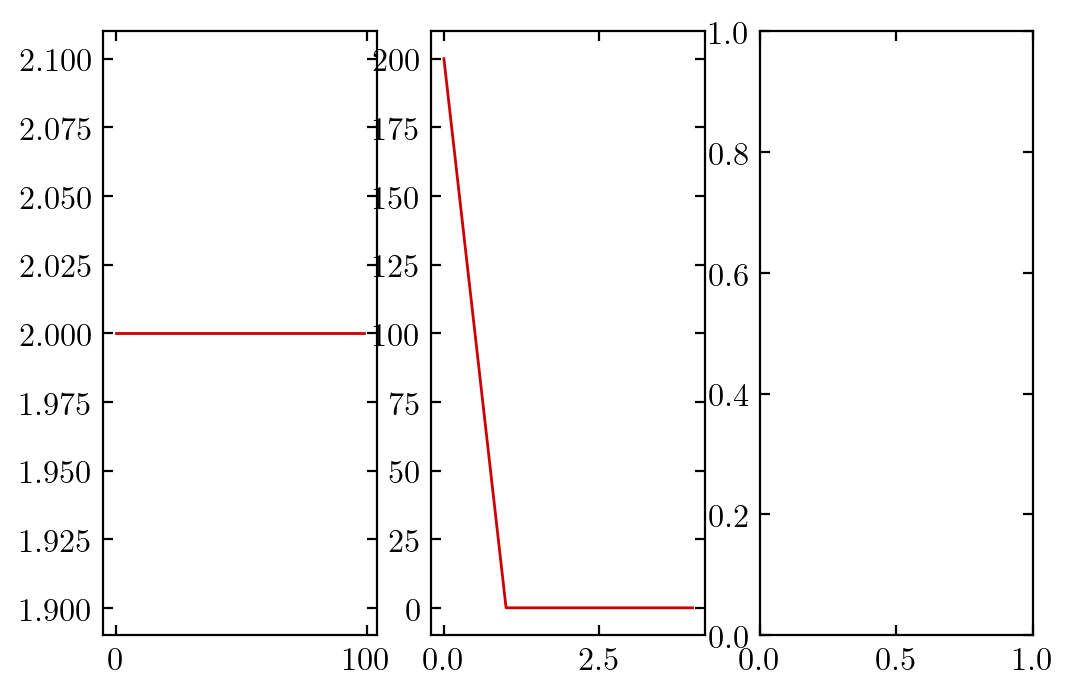

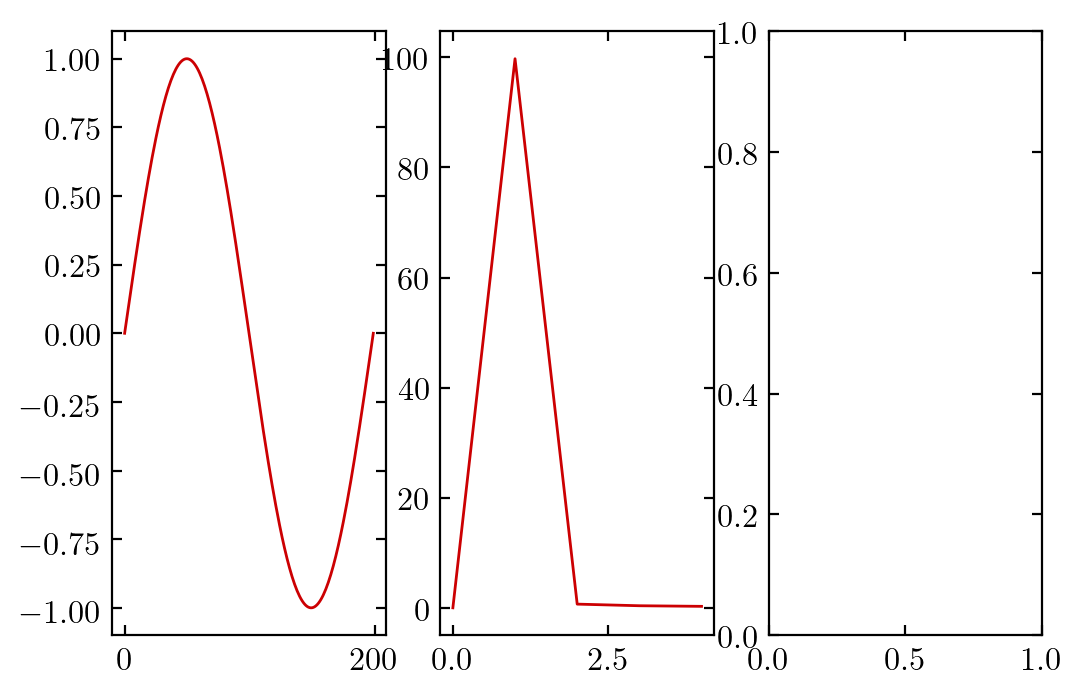

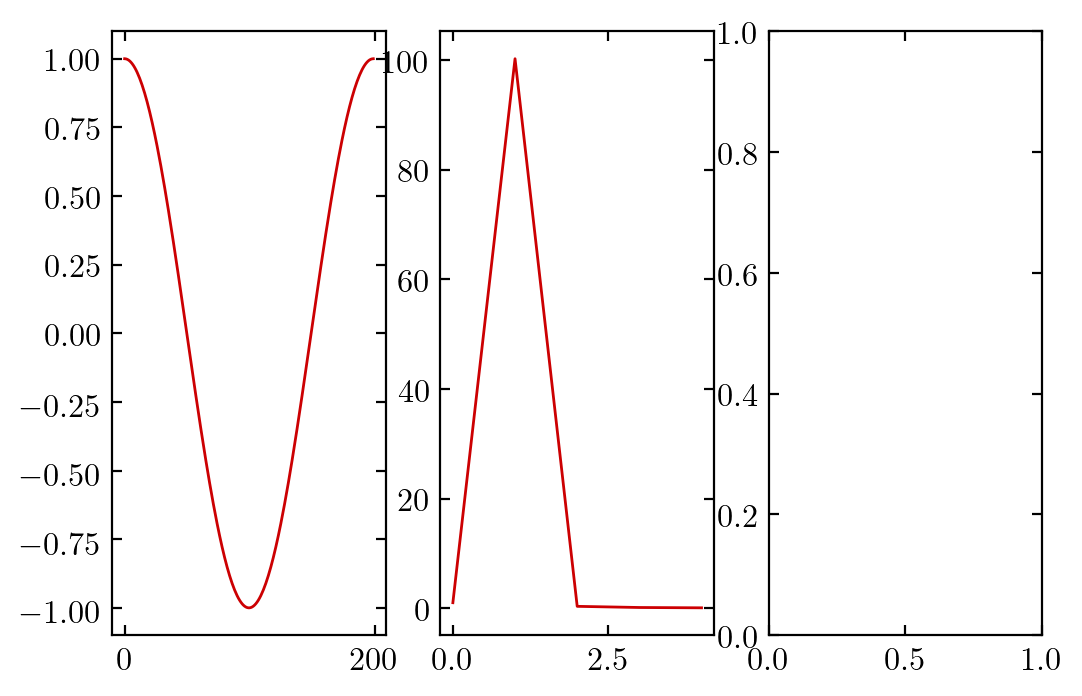

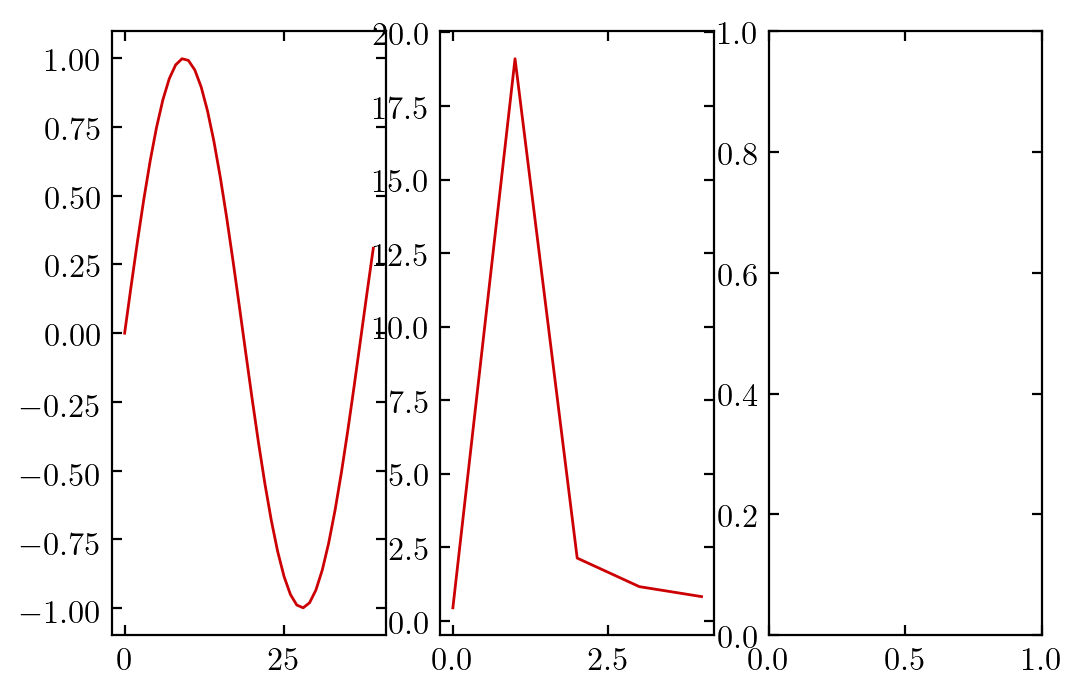

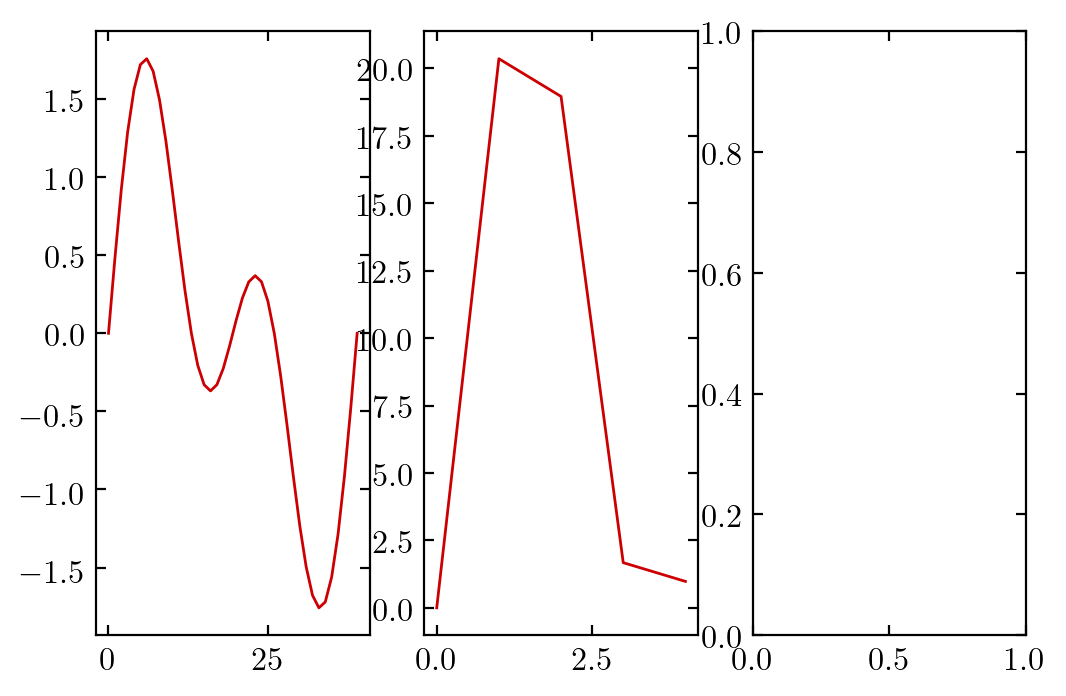

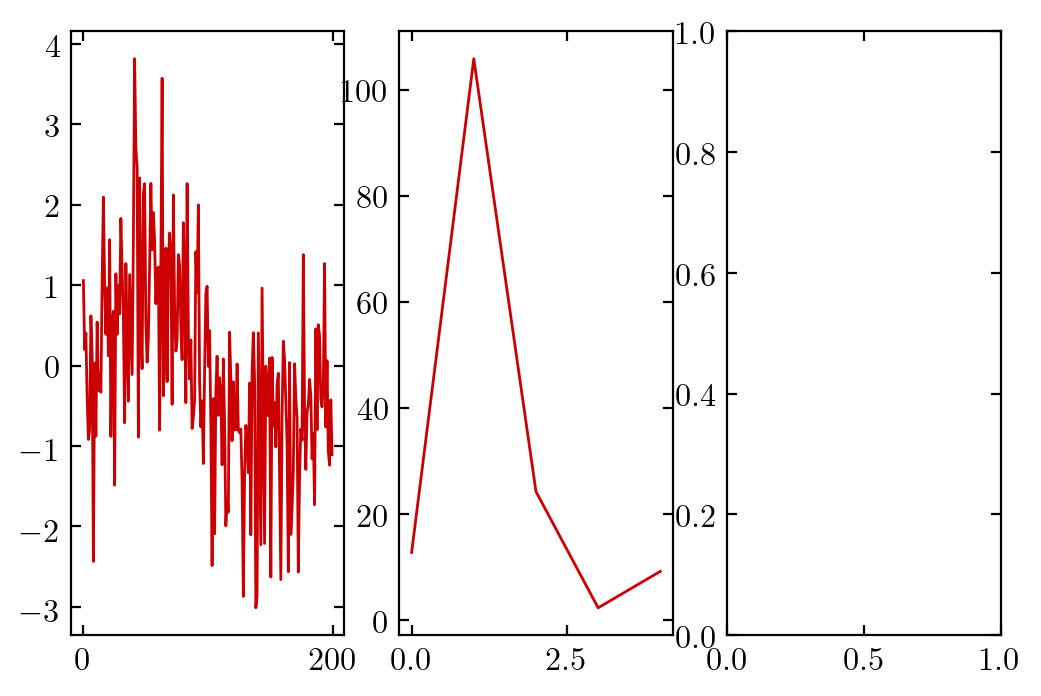

In [56]:
# No periodicity. As expected the first term just contains the sum.
example_ft(np.ones(100) * 2)

# A single sin wave. Almost all power in the first mode.
# I think the fact that it isn't all the power has to do with it being short and discrete.
# No idea why the last is also big...
n = 200
example_ft(np.sin(np.arange(n) * (2 * np.pi / (n-1))))
example_ft(np.cos(np.arange(n) * (2 * np.pi / (n-1))))


# Two periods of a sin wave. Almost all power in the second mode
n = 40
example_ft(np.sin(np.arange(n) * (2.1 * np.pi / (n-1))))

# Two periods of a sin wave. Almost all power in the second mode
n = 40
example_ft(np.sin(np.arange(n) * (4 * np.pi / (n-1))) + np.sin(np.arange(n) * (2 * np.pi / (n-1))))

# Noisy single sin
n = 200
example_ft(np.random.normal(size=n) + np.sin(np.arange(n) * (2 * np.pi / (n-1))))

# Simple Fourier Transform

A simple manual FFT

10.392788503392845


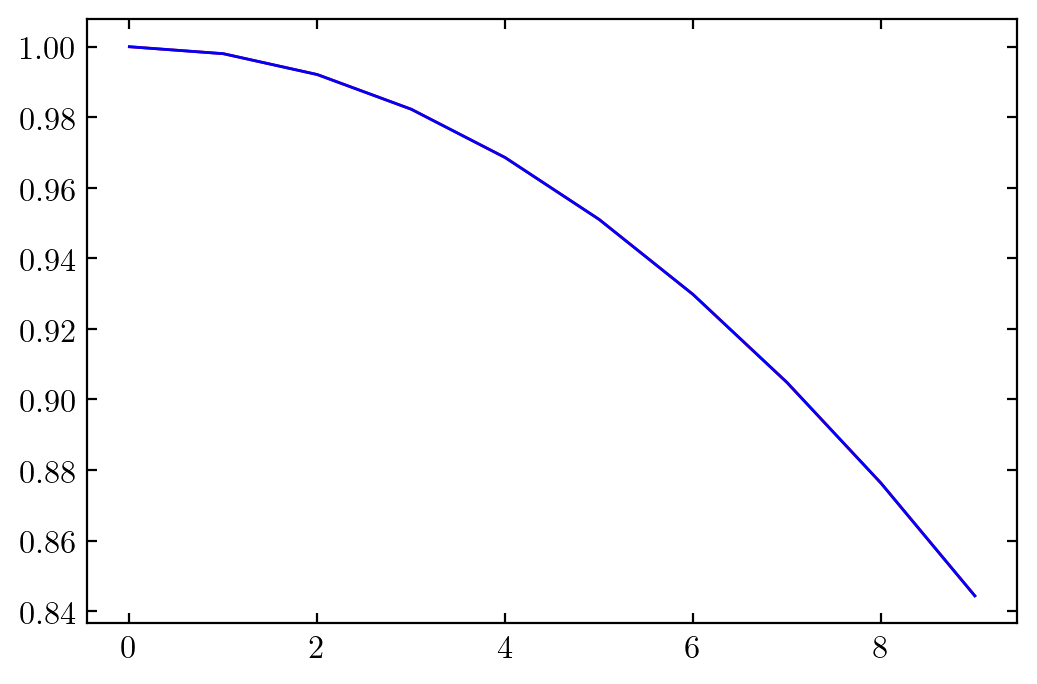

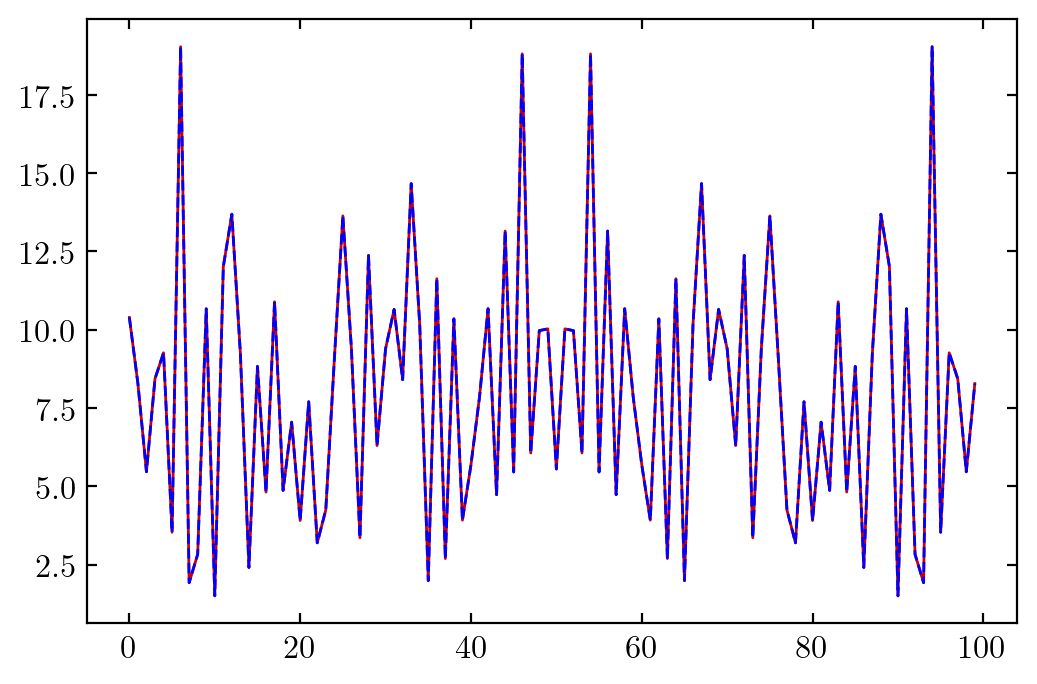

In [94]:
def sft(signal):
    spectrum = np.zeros(len(signal), dtype=np.complex)
    n = np.arange(len(spectrum))
    N = len(spectrum)
    
    for k in range(N):
        spectrum[k] = np.complex(
            np.dot(signal, np.cos(k * 2 * np.pi * n / N)),
            np.dot(signal, np.sin(k * 2 * np.pi * n / N))
        )
    
    # This is weird but important
    _, ax = plt.subplots()
    ax.plot(np.cos((N-1) * 2 * np.pi * n[:10] / N))
    ax.plot(np.cos((1) * 2 * np.pi * n[:10] / N))

    return spectrum

n = 100
signal = np.ones(n)
#signal = np.sin(np.arange(n) * (2 * np.pi / (n-1)))
signal = np.random.normal(size=n)

spectrum = sft(signal)
true_spectum = np.fft.fft(signal)

_, ax = plt.subplots()
ax.plot(np.abs(spectrum))
ax.plot(np.abs(true_spectum), linestyle="dashed")
print(np.sum(signal))